In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [ ]:
data = {'fired':[34, 37, 37, 38, 41, 42, 43, 44, 44, 45, 45, 45, 46, 48, 49, 53, 53, 54, 54, 55, 56],
        'not_fired':[27, 33, 36, 37, 38, 38, 39, 42, 42, 43, 43, 44, 44, 44, 45, 45, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 51, 51, 52, 54]}
data = pd.DataFrame.from_dict(data, orient='index').T
fig, ax = plt.subplots(1, len(data.columns))
i = 0
fig.suptitle('Group Histograms')
for x in data:
    ax[i].hist(data[x].dropna(), density=True)
    ax[i].set_title(x)
    x_lim = ax[i].get_xlim()
    x_vals = np.linspace(x_lim[0], x_lim[1], 100)
    p = stats.norm.pdf(x_vals, data[x].mean(), data[x].std())
    ax[i].plot(x_vals, p, 'k', linewidth=2)
    i+=1

fig2, ax2 = plt.subplots(1, 1)
fig2.suptitle('Box Plot')
data.boxplot()

fig3, ax3 = plt.subplots(1, 2)
fig3.suptitle('Quantile Plots Raw')
#data.values.
stats.probplot(data.fired, plot=ax3[0])
stats.probplot(data.not_fired, plot=ax3[1])
ax3[0].set_title('Fired')
ax3[1].set_title('Not-Fired')

fig4, ax4 = plt.subplots(1, 2)
fig4.suptitle('Quantile Plots Log')
#data.values.
stats.probplot(np.log(data.fired), plot=ax4[0])
stats.probplot(np.log(data.not_fired), plot=ax4[1])
ax4[0].set_title('Fired')
ax4[1].set_title('Not-Fired')



data_stats = data.describe()
fired_std = data_stats.fired['std']/data_stats.fired['count']**0.5
print(f'Pop Std: Fired {fired_std}')
not_fired_std = data_stats.not_fired['std']/data_stats.not_fired['count']**0.5
print(f'Pop Std: Not Fired {not_fired_std}')

stats 
#stats.index

In [19]:
def analyze_distribution(data):
    data = pd.DataFrame.from_dict(data, orient='index').T
    hist_fig, hist_ax = plt.subplots(1, len(data.columns))
    quant_fig, quant_ax = plt.subplots(1, len(data.columns))
    quantlog_fig, quantlog_ax = plt.subplots(1, len(data.columns))
    i = 0
    hist_fig.suptitle('Group Histograms')
    quant_fig.suptitle('Quantile Plots (Raw)')
    quantlog_fig.suptitle('Quantile Plots (Log)')
    for x in data:
        #plot a histogram
        hist_ax[i].hist(data[x].dropna(), density=True)
        hist_ax[i].set_title(x)
        #plt a normal with same std and mean
        x_lim = hist_ax[i].get_xlim()
        x_vals = np.linspace(x_lim[0], x_lim[1], 100)
        p = stats.norm.pdf(x_vals, data[x].mean(), data[x].std())
        hist_ax[i].plot(x_vals, p, 'k', linewidth=2)
        stats.probplot(data[x], plot=quant_ax[i])
        stats.probplot(np.log(data[x]), plot=quantlog_ax[i])
        quantlog_ax[i].set_title(x)
        quant_ax[i].set_title(x)
        i+=1

    box_fig, box_ax = plt.subplots(1, 1)
    box_fig.suptitle('Box Plot')
    data.boxplot()
    return data.describe()

,fired,not_fired
count,21.000000,30.000000
mean,45.857143,43.933333
std,6.521393,5.883544
min,34.000000,27.000000
25%,42.000000,42.000000
50%,45.000000,45.000000
75%,53.000000,47.750000
max,56.000000,54.000000


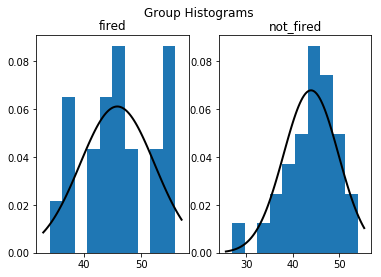

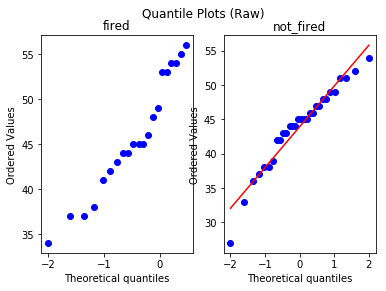

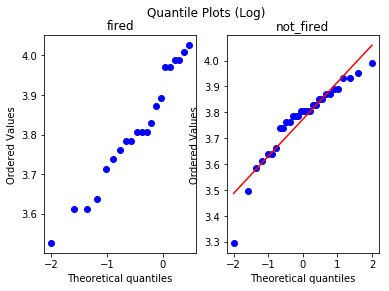

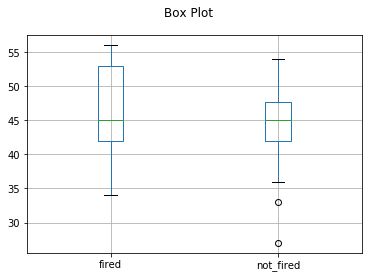

In [17]:
data = {'fired':[34, 37, 37, 38, 41, 42, 43, 44, 44, 45, 45, 45, 46, 48, 49, 53, 53, 54, 54, 55, 56],
        'not_fired':[27, 33, 36, 37, 38, 38, 39, 42, 42, 43, 43, 44, 44, 44, 45, 45, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 51, 51, 52, 54]}
analyze_distribution(data)

,0
p_value_perm,0.185
number_of_obs,30
mean,114.625
sample_std,227.756
std_dev,224.102
std_err,82.0131
min,0
max,1200
observed_diff,114.625
95_cl,"[-53.3711, 282.6211]"


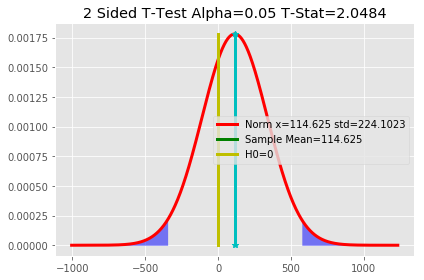

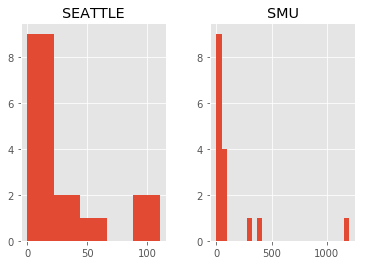

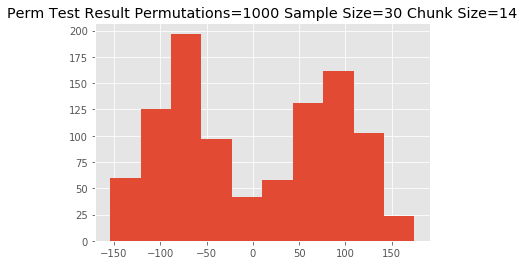

In [27]:
data = {'SMU':[34, 1200, 23, 50, 60, 50, 0, 0, 30, 89, 0, 300, 400, 20, 10, 0],
        'SEATTLE':[20, 10, 5, 0, 30, 50, 0, 100, 110, 0, 40, 10, 3, 0]}
#x = analyze_distribution(data)
run_analysis(pd.DataFrame.from_dict(data, orient='index').T, alpha=0.05, h0=0 )

In [22]:
def perm_test(data,  expected, observed, number_of_permutations=1000.0, sample_size=30, chunk_size=10):
    #flatten data into one array
    all_values = pd.DataFrame(data.values.flatten())
    #drop na values 
    all_values = all_values[~np.isnan(all_values)]
    assert(sample_size <= len(all_values))
    xbarholder = []
    counter = 0.0
    observed_diff = abs(expected - observed)
    for x in range(1, number_of_permutations):
        scramble = all_values.sample(sample_size)
        random_1 = scramble[0:chunk_size]
        random_2 = scramble[chunk_size:len(all_values)]
        assert(len(random_1) + len(random_2) == sample_size)
        diff = random_1.mean() - random_2.mean()
        xbarholder.append(diff.values[0])
        if abs(diff.values[0]) > observed_diff:
            counter += 1

    permutations = pd.DataFrame(pd.Series(xbarholder))
    permutations.hist()
    plt.title(f'Perm Test Result Permutations={round(number_of_permutations,0)} Sample Size={sample_size} Chunk Size={chunk_size}')
    return counter/number_of_permutations, observed_diff

In [23]:
def run_analysis(data, alpha, h0):
    #flatten data into one array
    all_values = data.values.flatten()
    #drop na values 
    all_values = all_values[~np.isnan(all_values)]
    sample_mean = all_values.mean()
    sample_std = all_values.std(ddof=1) #ddof = 1 implies sample std()
    
    #lets assume the pop std as sigma = s/sqrt(n)
    if len(data.columns) == 1:
        pop_std = sample_std/(len(all_values)**0.5)
        mean = all_values.mean()
        chunk_size = int(round(len(all_values)/2, 0))
        std_err = pop_std
    else: #pooled SD
        group_1 = data.iloc[:,0].dropna()
        group_2 = data.iloc[:,1].dropna()
        group_1_std = group_1.std(ddof=1)
        group_2_std = group_2.std(ddof=1)
        n1 = len(group_1) - 1
        n2 = len(group_2) - 1
        mean = group_1.mean() - group_2.mean()
        pop_std = (((n1*group_1_std**2)+(n2*group_2_std**2))/(n1+n2))**0.5
        chunk_size = len(group_1) if len(group_1) < len(group_2) else len(group_2)
        std_err = pop_std * ((1/len(group_1)) + (1/len(group_2)))**0.5
        
    df = len(all_values) - len(data.columns) #degrees of freedom = number of observations - number of classes
    
    t_stat, observed_t = plot_normal_dist(data, df,  h0, pop_std, alpha=alpha)
    
    p, diff = perm_test(data, h0, mean, 1000, len(all_values), chunk_size)
    
    summary = pd.DataFrame.from_dict(
        {
            'p_value_perm':p,
            'number_of_obs': len(all_values),
            'mean':mean,
            'sample_std':sample_std, 
            'std_dev':pop_std, 
            'std_err':std_err,
            'min':all_values.min(),
            'max':all_values.max(),
            'observed_diff': round(diff, 4),
            '95_cl':[round(mean-t_stat*std_err, 4), round(mean+t_stat*std_err, 4)],
            't_value': t_stat,
            'observed_t': observed_t,
            'df':df
        }, orient='index')
    return summary

In [26]:
def plot_normal_dist(data, df, h0 = 0.0, pop_std=1.0, band_size=5, alpha=0.05, color='b'):
    
    #flatten data into one array
    all_values = data.values.flatten()
    #drop na values 
    all_values = all_values[~np.isnan(all_values)]
    sample_std = all_values.std()
    #todo: write funciton for this
    if len(data.columns) == 1:
        mean = all_values.mean()
        observed_t = (mean - h0)/sample_std/len(all_values)**0.5
    else:
        group_1 = data.iloc[:,0].dropna()
        group_2 = data.iloc[:,1].dropna()
        group_1_std = group_1.std(ddof=1)
        group_2_std = group_2.std(ddof=1)
        n1 = len(group_1) - 1
        n2 = len(group_2) - 1
        mean = group_1.mean() - group_2.mean()
        pop_std = (((n1*group_1_std**2)+(n2*group_2_std**2))/(n1+n2))**0.5
        observed_t = mean/(pop_std *((1/len(group_1)) + (1/len(group_2)))**0.5)
    
    t_stat = stats.t.ppf(1-(alpha/2),df=df)
    plt.style.use('ggplot')
    plot_min = mean - band_size  * pop_std
    plot_max = mean + band_size * pop_std
    x = np.linspace(plot_min, plot_max, 1000)
    iq = stats.norm(mean, pop_std)
    normal = iq.pdf(x)
    plt.plot(x, normal, 'r-', lw=3, label=f'Norm x={round(mean, 4)} std={round(pop_std, 4)}') #plot the norm
    plt.plot([mean, mean], [0, normal.max()], 'g-', lw=3, label=f'Sample Mean={round(mean, 4)}') #plot the sample mean
    plt.plot([h0, h0], [0, normal.max()], 'y-', lw=3, label=f'H0={round(h0, 4)}') #plot the pop mean
    plt.plot([mean-observed_t, mean-observed_t], [0, iq.pdf(mean-observed_t)], 'c-*', lw=3) #plot the observed t
    plt.plot([mean+observed_t, mean+observed_t], [0, iq.pdf(mean+observed_t)], 'c-*', lw=3) #plot the observed t
    plt.legend()
    plt.title(f'2 Sided T-Test Alpha={alpha} T-Stat={round(t_stat, 4)}')
    low = mean - (t_stat*pop_std)
    high = mean + (t_stat*pop_std)
    p_low = x[np.logical_and(x <= low, x >= plot_min)]
    p_high = x[np.logical_and(x >= high, x <= plot_max)]
    plt.fill_between(
        p_low,
        iq.pdf(p_low),
        color=color,
        alpha=0.5,
        linewidth=0,
    )
    plt.fill_between(
        p_high,
        iq.pdf(p_high),
        color=color,
        alpha=0.5,
        linewidth=0,
    )
    plt.tight_layout()
    data.hist(bins='auto')
    return t_stat, observed_t